# Project

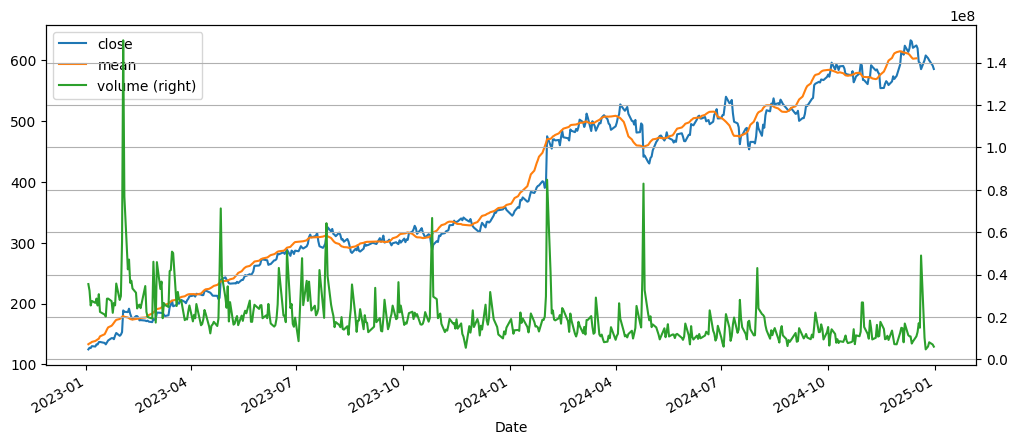

In [ ]:
import pandas as pd

def remove_dollar_sign(data:str) -> float:
    return float(data.replace('$', ''))

df = pd.read_csv(
    'data/fb_data.csv',
    parse_dates=['Date'],
    dayfirst=True,
    index_col='Date',
).rename(columns={
    'Close/Last':'close',
    'Open':'open',
    'High':'high',
    'Low':'low',
    'Volume':'volume',
}).assign(
    close = lambda x: x['close'].map(remove_dollar_sign),
    open = lambda x: x['open'].map(remove_dollar_sign),
    high = lambda x: x['high'].map(remove_dollar_sign),
    low = lambda x: x['low'].map(remove_dollar_sign),
    mean = lambda x: x['close'].rolling(14).mean(),

)
df.index = pd.to_datetime(df.index)
df = df.iloc[::-1]
from_ = '2023'
to = '2024'
df[from_:to].plot(
    y=['close', 'mean', 'volume'],
    secondary_y='volume',
    grid=True,
    figsize=(12,5),
);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-07 to 2025-01-06
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2516 non-null   object 
 1   Volume      2516 non-null   int64  
 2   Open        2516 non-null   object 
 3   High        2516 non-null   object 
 4   Low         2516 non-null   object 
 5   Close       2516 non-null   float64
 6   Mean        2503 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 221.8+ KB


In [ ]:
df

,close,volume,open,high,low,mean
Date,,,,,,
2015-01-07,76.150,22015250,76.760,77.3600,75.8200,76.605714
2015-01-08,78.175,23931830,76.740,78.2300,76.0800,76.612143
2015-01-09,77.740,21146060,78.200,78.6200,77.2000,76.599643
2015-01-12,76.720,19150390,77.840,78.0000,76.2100,76.468929
2015-01-13,76.450,25149270,77.230,78.0800,75.8500,76.345357
...,...,...,...,...,...,...
2024-12-30,591.240,7025864,588.750,596.9399,585.5800,NaN
2024-12-31,585.510,6019520,592.265,593.9700,583.8500,NaN
2025-01-02,599.240,12682270,589.720,604.9100,587.8200,NaN
